#### Book says: 

> **Single stock returns are not autocorrelated**

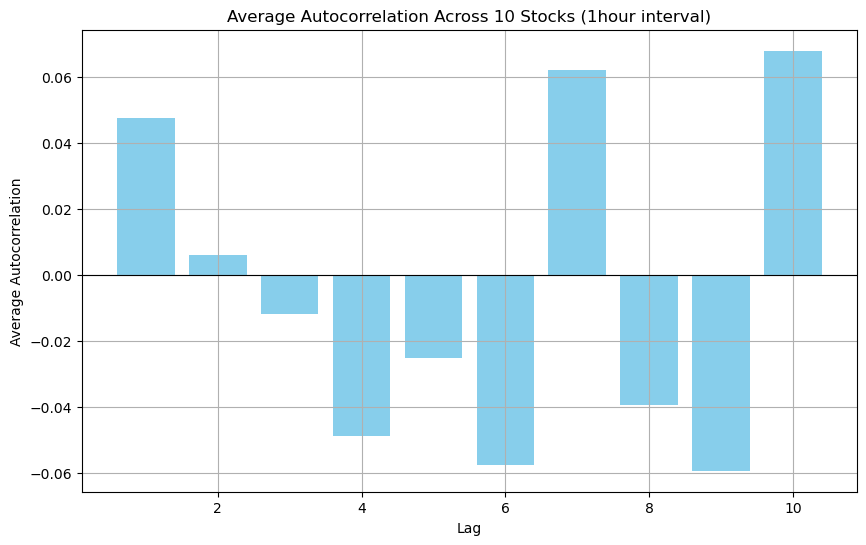

Average Autocorrelations across all securities:
Lag 1: 0.0477
Lag 2: 0.0059
Lag 3: -0.0118
Lag 4: -0.0488
Lag 5: -0.0253
Lag 6: -0.0578
Lag 7: 0.0622
Lag 8: -0.0396
Lag 9: -0.0595
Lag 10: 0.0681


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('FMP_API_KEY')

def fetch_data(symbol, interval, api_key):
    url = f'https://financialmodelingprep.com/api/v3/historical-chart/{interval}/{symbol}?apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values('date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'BRK.B', 'JPM', 'V']
interval = '1hour'  # or '5min', '30min', '4hour', 'daily'
lags = range(1, 11)

autocorr_matrix = []

for symbol in symbols:
    try:
        df = fetch_data(symbol, interval, API_KEY)
        df['simple_return'] = df['close'].pct_change()
        returns = df['simple_return'].dropna()

        autocorrs = [returns.autocorr(lag) for lag in lags]
        autocorr_matrix.append(autocorrs)

    except Exception as e:
        print(f"Error fetching or processing {symbol}: {e}")

autocorr_matrix = np.array(autocorr_matrix)
avg_autocorrs = np.nanmean(autocorr_matrix, axis=0)

# --- Plot the average autocorrelations ---
plt.figure(figsize=(10, 6))
plt.bar(lags, avg_autocorrs, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)
plt.title(f'Average Autocorrelation Across {len(symbols)} Stocks ({interval} interval)')
plt.xlabel('Lag')
plt.ylabel('Average Autocorrelation')
plt.grid(True)
plt.show()

print("Average Autocorrelations across all securities:")
for lag, ac in zip(lags, avg_autocorrs):
    print(f"Lag {lag}: {ac:.4f}")


#### Book says: 

> **Second moment $returns^2$ of single stock returns is autocorrelated**

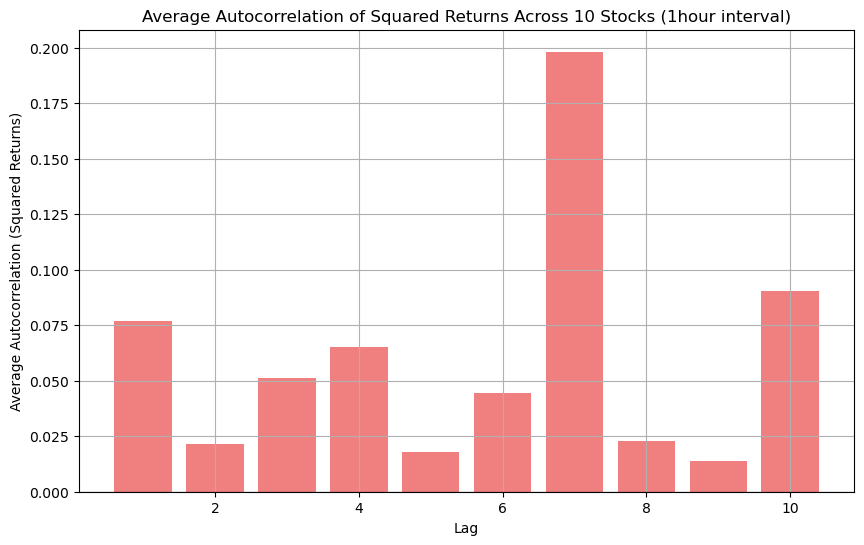

Average Autocorrelations of Squared Returns across all securities:
Lag 1: 0.0767
Lag 2: 0.0215
Lag 3: 0.0512
Lag 4: 0.0654
Lag 5: 0.0180
Lag 6: 0.0447
Lag 7: 0.1982
Lag 8: 0.0228
Lag 9: 0.0137
Lag 10: 0.0904


In [10]:
autocorr_matrix_squared = []

for symbol in symbols:
    try:
        df = fetch_data(symbol, interval, API_KEY)
        df['simple_return'] = df['close'].pct_change()
        returns = df['simple_return'].dropna()

        returns_squared = returns ** 2  # square the returns
        autocorrs_squared = [returns_squared.autocorr(lag) for lag in lags]
        autocorr_matrix_squared.append(autocorrs_squared)

    except Exception as e:
        print(f"Error fetching or processing {symbol}: {e}")

autocorr_matrix_squared = np.array(autocorr_matrix_squared)
avg_autocorrs_squared = np.nanmean(autocorr_matrix_squared, axis=0)

# --- Plot the average autocorrelations (squared returns) ---
plt.figure(figsize=(10, 6))
plt.bar(lags, avg_autocorrs_squared, color='lightcoral')
plt.axhline(0, color='black', linewidth=0.8)
plt.title(f'Average Autocorrelation of Squared Returns Across {len(symbols)} Stocks ({interval} interval)')
plt.xlabel('Lag')
plt.ylabel('Average Autocorrelation (Squared Returns)')
plt.grid(True)
plt.show()

# --- Print results ---
print("Average Autocorrelations of Squared Returns across all securities:")
for lag, ac in zip(lags, avg_autocorrs_squared):
    print(f"Lag {lag}: {ac:.4f}")

#### Book says: 

> **Absolute value $|returns|$ of single stock returns is autocorrelated**

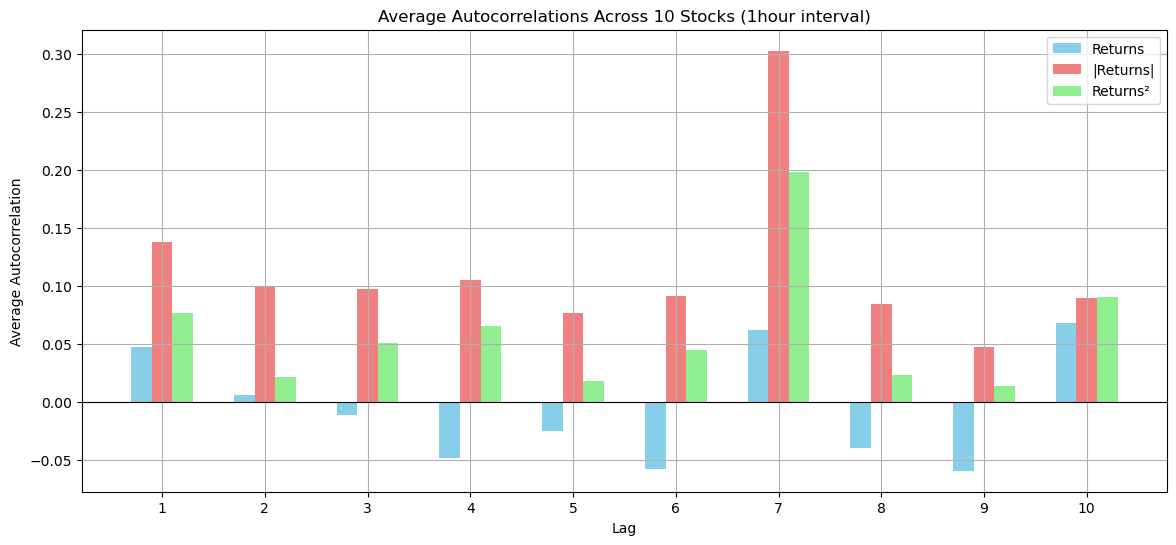

Average Autocorrelations across all securities:

Lag 1:  Returns=0.0477,  |Returns|=0.1378,  Returns²=0.0767
Lag 2:  Returns=0.0059,  |Returns|=0.0991,  Returns²=0.0215
Lag 3:  Returns=-0.0118,  |Returns|=0.0977,  Returns²=0.0512
Lag 4:  Returns=-0.0488,  |Returns|=0.1050,  Returns²=0.0654
Lag 5:  Returns=-0.0253,  |Returns|=0.0764,  Returns²=0.0180
Lag 6:  Returns=-0.0578,  |Returns|=0.0913,  Returns²=0.0447
Lag 7:  Returns=0.0622,  |Returns|=0.3030,  Returns²=0.1982
Lag 8:  Returns=-0.0396,  |Returns|=0.0848,  Returns²=0.0228
Lag 9:  Returns=-0.0595,  |Returns|=0.0476,  Returns²=0.0137
Lag 10:  Returns=0.0681,  |Returns|=0.0897,  Returns²=0.0904


In [11]:
# --- Initialize storage ---
autocorr_matrix_returns = []
autocorr_matrix_squared = []
autocorr_matrix_absolute = []

# --- Loop over symbols ---
for symbol in symbols:
    try:
        df = fetch_data(symbol, interval, API_KEY)
        df['simple_return'] = df['close'].pct_change()
        returns = df['simple_return'].dropna()

        # Raw returns
        autocorrs_returns = [returns.autocorr(lag) for lag in lags]
        autocorr_matrix_returns.append(autocorrs_returns)

        # Squared returns
        returns_squared = returns ** 2
        autocorrs_squared = [returns_squared.autocorr(lag) for lag in lags]
        autocorr_matrix_squared.append(autocorrs_squared)

        # Absolute returns
        returns_abs = returns.abs()
        autocorrs_absolute = [returns_abs.autocorr(lag) for lag in lags]
        autocorr_matrix_absolute.append(autocorrs_absolute)

    except Exception as e:
        print(f"Error fetching or processing {symbol}: {e}")

# --- Compute averages ---
autocorr_matrix_returns = np.array(autocorr_matrix_returns)
autocorr_matrix_squared = np.array(autocorr_matrix_squared)
autocorr_matrix_absolute = np.array(autocorr_matrix_absolute)

avg_autocorr_returns = np.nanmean(autocorr_matrix_returns, axis=0)
avg_autocorr_squared = np.nanmean(autocorr_matrix_squared, axis=0)
avg_autocorr_absolute = np.nanmean(autocorr_matrix_absolute, axis=0)

# --- Plot results ---
plt.figure(figsize=(14, 6))

plt.bar([x - 0.2 for x in lags], avg_autocorr_returns, width=0.2, label='Returns', color='skyblue')
plt.bar(lags, avg_autocorr_absolute, width=0.2, label='|Returns|', color='lightcoral')
plt.bar([x + 0.2 for x in lags], avg_autocorr_squared, width=0.2, label='Returns²', color='lightgreen')

plt.axhline(0, color='black', linewidth=0.8)
plt.title(f'Average Autocorrelations Across {len(symbols)} Stocks ({interval} interval)')
plt.xlabel('Lag')
plt.ylabel('Average Autocorrelation')
plt.xticks(lags)
plt.grid(True)
plt.legend()
plt.show()

# --- Print results ---
print("Average Autocorrelations across all securities:\n")

for i, lag in enumerate(lags):
    print(f"Lag {lag}:  Returns={avg_autocorr_returns[i]:.4f},  |Returns|={avg_autocorr_absolute[i]:.4f},  Returns²={avg_autocorr_squared[i]:.4f}")


#### Book says: 

> **At longer timeframes (weekly, monthly, etc.), the distribution of log returns becomes more normal**

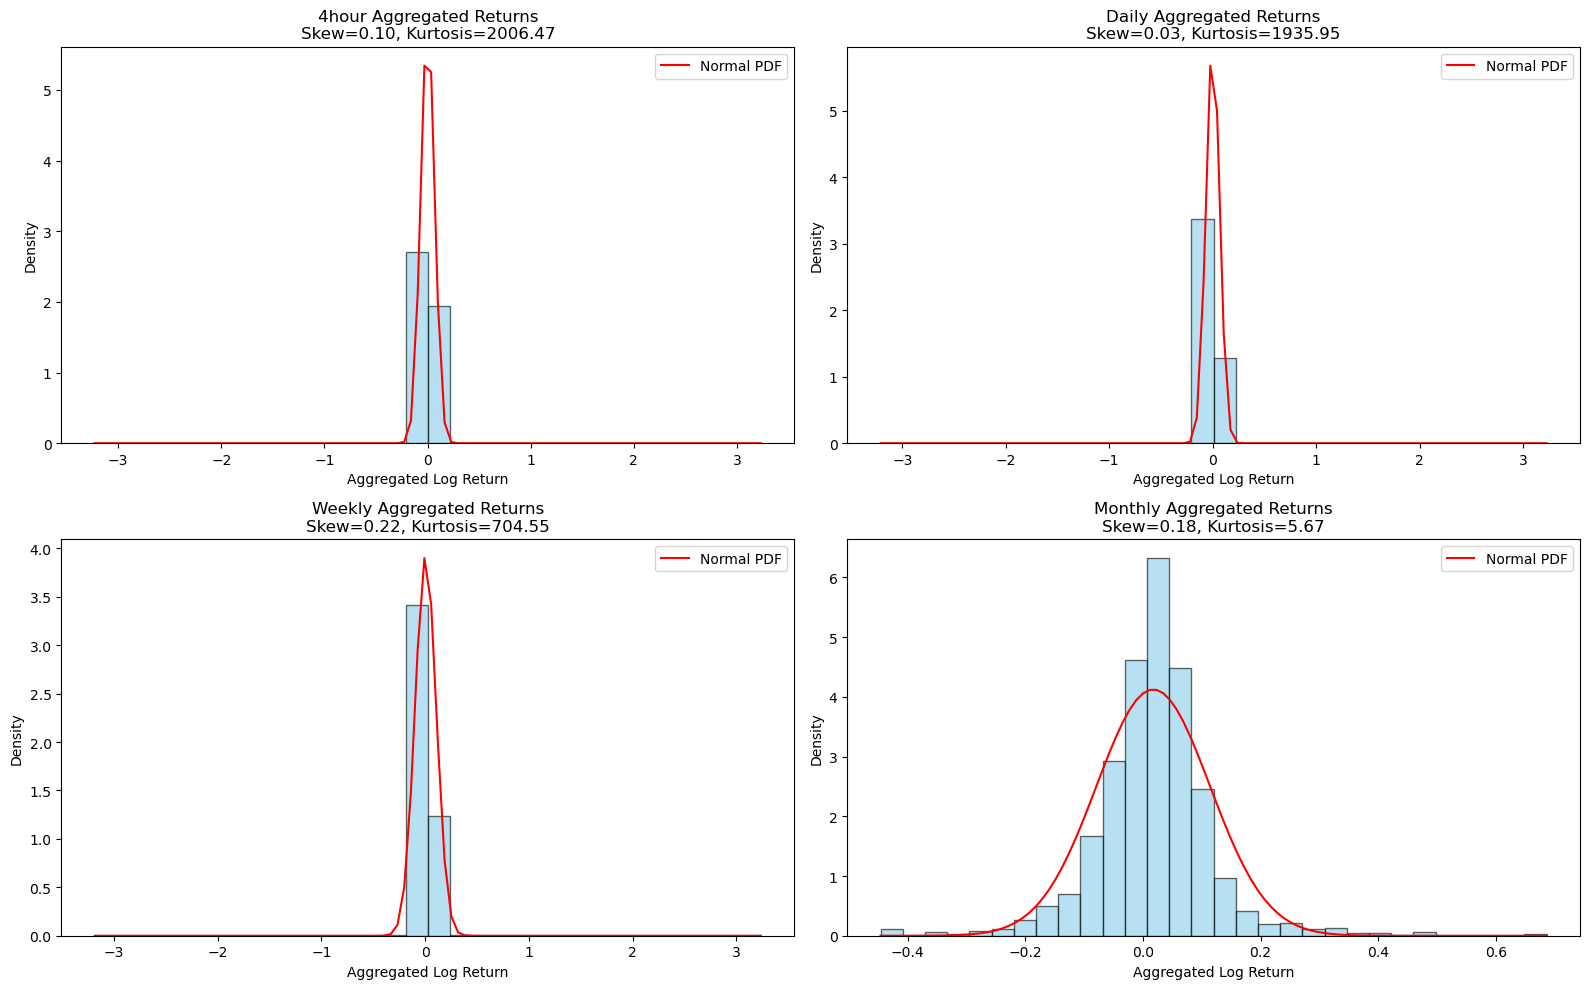

In [20]:
from datetime import datetime, timedelta
import scipy.stats as stats
import datetime

# --- Function to fetch 4-hour data with date range ---
def fetch_4hour_data(symbol, api_key, from_date=None, to_date=None):
    url = f'https://financialmodelingprep.com/api/v3/historical-chart/4hour/{symbol}?apikey={api_key}'
    if from_date and to_date:
        url += f"&from={from_date}&to={to_date}"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data)
    if df.empty:
        return df
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values('date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

# --- Parameters ---
symbols = ['SPY', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 'TSLA', 'NVDA', 'JPM', 'V']
aggregation_windows = {
    '4hour': 1,
    'daily': 2,
    'weekly': 10,
    'monthly': 40
}
chunk_size = 180  # days per pull
num_chunks = 20   # extend back a long time (~10 years)

# --- Initialize aggregated returns storage ---
aggregated_returns = {name: [] for name in aggregation_windows.keys()}

# --- Loop through all symbols ---
for symbol in symbols:
    date_ranges = []
    today = datetime.today()

    for i in range(num_chunks):
        to_date = today - timedelta(days=i * chunk_size)
        from_date = to_date - timedelta(days=chunk_size)
        date_ranges.append((from_date.strftime('%Y-%m-%d'), to_date.strftime('%Y-%m-%d')))

    # --- Fetch and combine chunks ---
    dfs = []
    for from_date, to_date in date_ranges:
        df_chunk = fetch_4hour_data(symbol, API_KEY, from_date=from_date, to_date=to_date)
        if not df_chunk.empty:
            dfs.append(df_chunk)

    if not dfs:
        continue

    df = pd.concat(dfs)
    df.sort_values('date', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # --- Compute log returns ---
    df['simple_return'] = df['close'].pct_change()
    df['log_return'] = np.log(1 + df['simple_return'])
    df.dropna(inplace=True)

    # --- Aggregate returns for each timeframe ---
    for name, window in aggregation_windows.items():
        agg_returns = df['log_return'].groupby(np.arange(len(df)) // window).sum()
        aggregated_returns[name].append(agg_returns)

# --- Combine returns across all stocks ---
for name in aggregated_returns.keys():
    aggregated_returns[name] = pd.concat(aggregated_returns[name])

# --- Plotting ---
plt.figure(figsize=(16, 10))
plot_idx = 1

for name, returns in aggregated_returns.items():
    plt.subplot(2, 2, plot_idx)
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Overlay normal curve
    mean = returns.mean()
    std = returns.std()
    x = np.linspace(returns.min(), returns.max(), 100)
    plt.plot(x, stats.norm.pdf(x, mean, std), 'r', label='Normal PDF')

    skewness = stats.skew(returns)
    kurtosis = stats.kurtosis(returns, fisher=True)

    plt.title(f'{name.capitalize()} Aggregated Returns\nSkew={skewness:.2f}, Kurtosis={kurtosis:.2f}')
    plt.xlabel('Aggregated Log Return')
    plt.ylabel('Density')
    plt.legend()
    plot_idx += 1

plt.tight_layout()
plt.show()
